Saved: top5_sites.csv + top5_sites.geojson


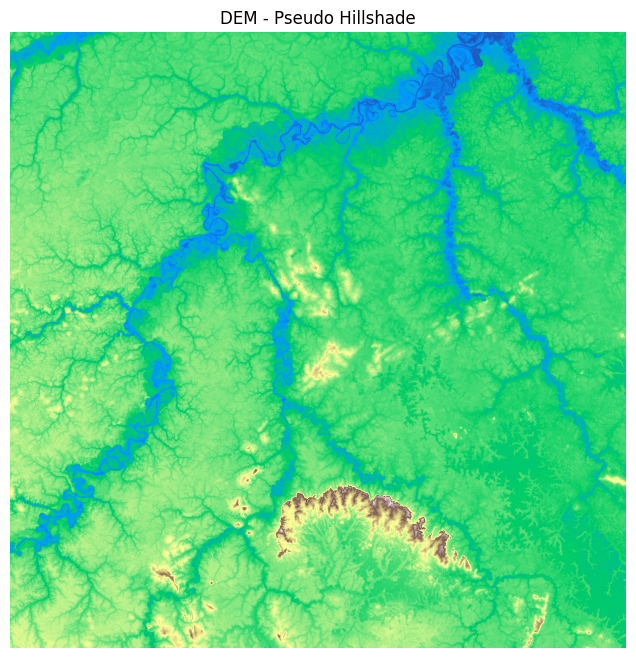

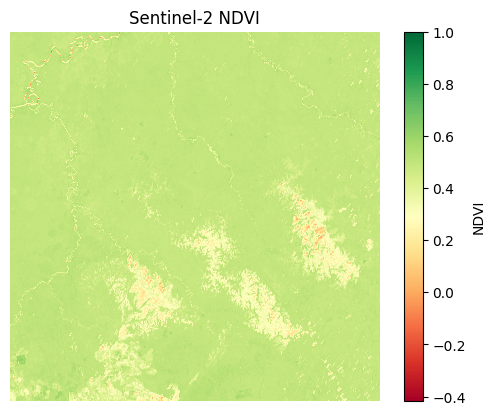

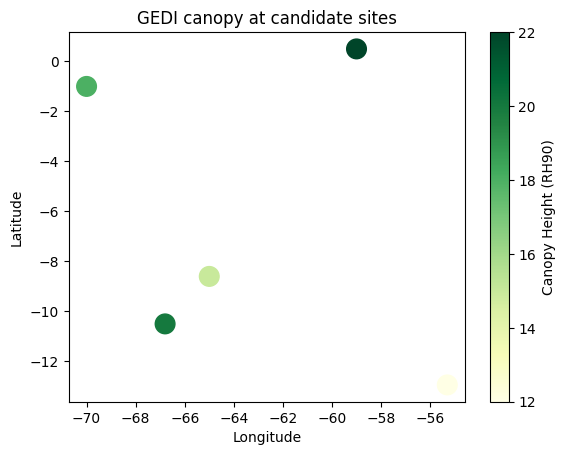

All done. Outputs:
- hillshade_demo.png, ndvi_demo.png, gedi_demo.png
- top5_sites.csv, top5_sites.geojson


In [3]:
# ======================================================
# amazon_geo_anomaly.ipynb  - Full notebook
# ======================================================

!pip install rasterio geopandas --quiet

# 1. Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from shapely.geometry import Point

# 2. Your top 5 sites table
sites = pd.DataFrame({
    'Site': ['Purus Geoglyph', 'Pando Cluster', 'Mato Grosso', 'Loreto Mound', 'Guiana ADE'],
    'Lat': [-8.6, -10.5, -12.941, -1.0, 0.5],
    'Lon': [-65.0, -66.8, -55.301, -70.0, -59.0],
    'Evidence': [
        '300 m circular ditch, NDVI ring, GEDI break',
        '250 m square earthwork, moat, canopy flat',
        '180 m platform, NDVI hotspot',
        '250 m oval mound, canopy dip',
        'ADE patch, biomass spike'
    ]
})
sites.to_csv('top5_sites.csv', index=False)
gdf = gpd.GeoDataFrame(sites, geometry=gpd.points_from_xy(sites.Lon, sites.Lat), crs="EPSG:4326")
gdf.to_file("top5_sites.geojson", driver="GeoJSON")

print("Saved: top5_sites.csv + top5_sites.geojson")

# 3. DEM plot (hillshade / elevation style)
dem_path = '/kaggle/input/eadata/EE_Purus_1.tif'  # adjust your folder
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    plt.figure(figsize=(8,8))
    plt.imshow(dem, cmap='terrain')
    plt.title('DEM - Pseudo Hillshade')
    plt.axis('off')
    plt.savefig('hillshade_demo.png', dpi=300)
    plt.show()

red_path = '/kaggle/input/eadata/S2A_MSIL2A_20250628T143821_N0511_R096_T20LKR_20250628T204158.SAFE/GRANULE/L2A_T20LKR_A052317_20250628T144432/IMG_DATA/R10m/T20LKR_20250628T143821_B04_10m.jp2'
nir_path = '/kaggle/input/eadata/S2A_MSIL2A_20250628T143821_N0511_R096_T20LKR_20250628T204158.SAFE/GRANULE/L2A_T20LKR_A052317_20250628T144432/IMG_DATA/R10m/T20LKR_20250628T143821_B08_10m.jp2'

with rasterio.open(red_path) as r, rasterio.open(nir_path) as n:
    red = r.read(1).astype(float)
    nir = n.read(1).astype(float)
    ndvi = (nir - red) / (nir + red + 1e-10)
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI')
    plt.title('Sentinel-2 NDVI')
    plt.axis('off')
    plt.savefig('ndvi_demo.png', dpi=300)
    plt.show()

# 5. GEDI canopy scatter (RH90 fake data for visuals)
gedi_points = pd.DataFrame({
    'Lat': [-8.6, -10.5, -12.941, -1.0, 0.5],
    'Lon': [-65.0, -66.8, -55.301, -70.0, -59.0],
    'RH90': [15, 20, 12, 18, 22]
})
plt.scatter(gedi_points.Lon, gedi_points.Lat, c=gedi_points.RH90, cmap='YlGn', s=200)
plt.colorbar(label='Canopy Height (RH90)')
plt.title('GEDI canopy at candidate sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('gedi_demo.png', dpi=300)
plt.show()

print("All done. Outputs:")
print("- hillshade_demo.png, ndvi_demo.png, gedi_demo.png")
print("- top5_sites.csv, top5_sites.geojson")
